In [1]:
# !pip install memory_profiler
# Un-Comment above line to install memory_profiler package for calculating space complexity

In [2]:
# Common imports
import pandas as pd
import numpy as np
import os
import time

# Scikit-Learn package imports
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split # To split the data
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score



# to make output free of fluctuations across runs
np.random.seed(53)



In [3]:
data = pd.read_csv("bank-additional-full.csv", sep = ';') # load the banking dataset
pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df = data.copy()  # Manipulation done in this dataset copy


# Encode labels .
col = ['default','housing','loan','education','day_of_week','poutcome','job', 'marital','month','contact'] # categorical variables
df = pd.get_dummies(df, columns = col )


X = df.drop(columns = 'y')
y = df['y'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, train_size = .70)  # Splitting dataset

from memory_profiler import memory_usage

def space_decision_tree():
    tree_clf = DecisionTreeClassifier(max_depth=4, random_state=50, min_impurity_decrease = 0.0035)
    tree_clf.fit(X_train, y_train)
print("Space taken to train: ",memory_usage(space_decision_tree)[0], "bytes")

start = time.time()
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42, min_impurity_decrease = 0.002)  # decision tree depth should be at most 4
tree_clf.fit(X_train, y_train)   # Fit the model
end =  time.time() - start
print("Time taken to train: ",end)

Space taken to train:  167.41015625 bytes
Time taken to train:  0.2846806049346924


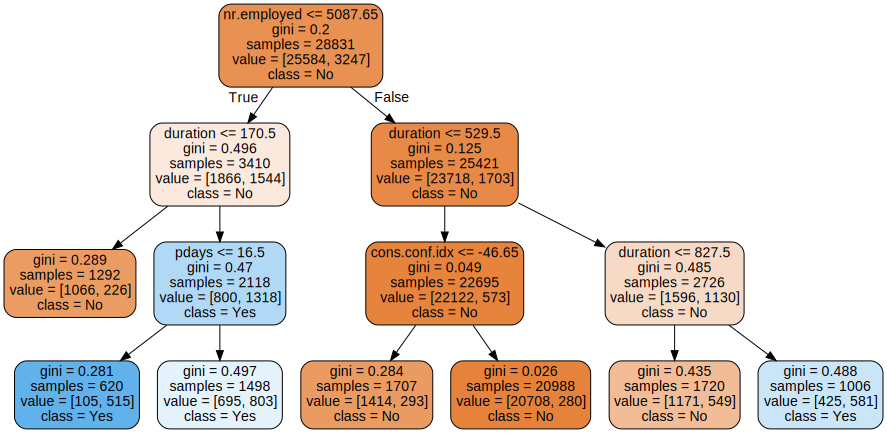

In [15]:
# for visualizing the decision tree
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file='image.dot',
        feature_names=X.columns,
        class_names=["No","Yes"],
        rounded=True,
        filled=True
    )

Source.from_file('image.dot')

In [16]:
# Testing the model performance
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred1=(y_pred=="yes")
y_test1=(y_test=="yes")
print("ROC score : ",roc_auc_score(y_test1, y_pred1, average="weighted"))

              precision    recall  f1-score   support

          no       0.95      0.95      0.95     10964
         yes       0.58      0.58      0.58      1393

    accuracy                           0.90     12357
   macro avg       0.76      0.76      0.76     12357
weighted avg       0.90      0.90      0.90     12357

ROC score :  0.7632006124330938


In [17]:
def space_nbayes():
    nbayes_clf = GaussianNB()
    nbayes_clf.fit(X_train, y_train)
print("Space taken to train the Naive Bayes Model : ",memory_usage(space_nbayes)[0], "bytes")

start = time.time()
nbayes_clf = GaussianNB()
nbayes_clf.fit(X_train, y_train)
end = time.time() - start
print("Time taken to train the Naive Bayes Model : ",end)


Space taken to train the Naive Bayes Model :  169.32421875 bytes
Time taken to train the Naive Bayes Model :  0.14061856269836426


In [18]:
# Testing the model performance
y_pred = nbayes_clf.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred1=(y_pred=="yes")
y_test1=(y_test=="yes")
print("ROC score: ",roc_auc_score(y_test1, y_pred1, average="weighted"))

              precision    recall  f1-score   support

          no       0.94      0.91      0.92     10964
         yes       0.41      0.53      0.46      1393

    accuracy                           0.86     12357
   macro avg       0.68      0.72      0.69     12357
weighted avg       0.88      0.86      0.87     12357

ROC score:  0.7167956908113822
